In [0]:
# loads the drive 
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Import numpy, pandas, matpltlib.pyplot, sklearn modules and seaborn
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from tqdm import tqdm
import gc

%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB 

from xgboost import XGBClassifier
import lightgbm as lgbm
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import svm

from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


from keras.regularizers import l2
from keras import backend as K
from keras.models import load_model
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Conv1D, MaxPool1D, Flatten
from keras.layers import Concatenate
from keras import optimizers
from keras.callbacks import *


from imblearn.over_sampling import SMOTENC
import pickle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
batch_size = 28 
nb_epochs = 10

In [0]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [0]:
def import_data():
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv("/content/gdrive/My Drive/Kaggle/US_Accidents_Dec19.csv")
    df = reduce_mem_usage(df)
    return df

In [0]:
# Import the data
df = import_data()

Memory usage of dataframe is 853.80 MB
Memory usage after optimization is: 689.50 MB
Decreased by 19.2%


In [0]:
# for col in df.columns:
#   print(f"{col} - {df[f'{col}'].dtype}")

df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

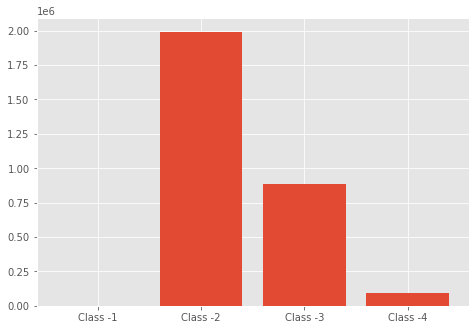

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Classes = ['Class -1', 'Class -2', 'Class -3', 'Class -4']
count = Counter(df["Severity"])
counts = [count[1], count[2], count[3], count[4]]
ax.bar(Classes,counts)
plt.show()

In [0]:
# Convert Start_Time and End_Time to datetypes
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Extract year, month, day, hour and weekday
df['Year']=df['Start_Time'].dt.year
df['Month']=df['Start_Time'].dt.strftime('%b')
df['Day']=df['Start_Time'].dt.day
df['Hour']=df['Start_Time'].dt.hour
df['Weekday']=df['Start_Time'].dt.strftime('%a')

# Extract the amount of time in the unit of minutes for each accident, round to the nearest integer
td='Time_Duration(min)'
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))
# df.info()

In [0]:
# Check if there is any negative time_duration values
df[td][df[td]<=0]

# Drop the rows with td<0

neg_outliers =df[td]<=0

# Set outliers to NAN
df[neg_outliers] = np.nan

# Drop rows with negative td
df.dropna(subset=[td],axis=0,inplace=True)

# Double check to make sure no more negative td
print("Double check to make sure no more negative td: ", df[td][df[td]<=0])

del neg_outliers


Double check to make sure no more negative td:  Series([], Name: Time_Duration(min), dtype: float64)


In [0]:
# Print time_duration information
print('Max time to clear an accident: {} minutes or {} hours or {} days; Min to clear an accident td: {} minutes.'.format(df[td].max(),round(df[td].max()/60), round(df[td].max()/60/24), df[td].min()))

Max time to clear an accident: 1786320.0 minutes or 29772 hours or 1240 days; Min to clear an accident td: 1.0 minutes.


In [0]:
# Set the list of features to include in Machine Learning
feature_lst=[
             'TMC',
             'Severity',
             'Start_Lng','Start_Lat',
             'Side','City','County','State',
             'Timezone',
             'Temperature(F)','Humidity(%)','Pressure(in)', 'Visibility(mi)', 
             'Wind_Direction',
             'Weather_Condition','Amenity','Bump',
             'Crossing','Give_Way','Junction','No_Exit','Railway',
             'Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal',
             'Turning_Loop','Sunrise_Sunset','Hour','Weekday', 
            ]

In [0]:
# Select the dataset to include only the selected features
df_sel =df[feature_lst].copy()

del df

In [0]:
def missing_data_stats(df):
    zero_val = (df == 0.00).astype(int).sum(axis=0)
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
    columns = {0 : 'Zero Values', 1 : 'Missing(Null) Values', 2 : '% of Total Missing(Null) Values'})
    mz_table['Total (Zero + Missing) Values'] = mz_table['Zero Values'] + mz_table['Missing(Null) Values']
    mz_table['% Total (Zero + Missing) Values'] = 100 * mz_table['Total (Zero + Missing) Values'] / len(df)
    mz_table['Data Type'] = df.dtypes
    mz_table = mz_table[mz_table.iloc[:,1] != 0].sort_values('% of Total Missing(Null) Values', ascending=False).round(1)
    print ("There are " + str(mz_table.shape[0]) + " columns that have missing values out of ", len(df.columns), " columns.")
    if int(mz_table.shape[0]) != 0:
        return mz_table
    else:
        return None
    
faulty_data = missing_data_stats(df_sel)
faulty_data

There are 10 columns that have missing values out of  31  columns.


,Zero Values,Missing(Null) Values,% of Total Missing(Null) Values,Total (Zero + Missing) Values,% Total (Zero + Missing) Values,Data Type
TMC,0,728067,24.5,728067,24.5,float16
Weather_Condition,0,65932,2.2,65932,2.2,category
Visibility(mi),800,65691,2.2,66491,2.2,float16
Humidity(%),0,59173,2.0,59173,2.0,float16
Temperature(F),651,56063,1.9,56714,1.9,float16
Pressure(in),2,48142,1.6,48144,1.6,float16
Wind_Direction,0,45101,1.5,45101,1.5,category
Timezone,0,3163,0.1,3163,0.1,category
Sunrise_Sunset,0,93,0.0,93,0.0,category
City,0,83,0.0,83,0.0,category


In [0]:
df_sel['Weather_Condition'].fillna(df_sel['Weather_Condition'].value_counts().index[0], inplace =True) 

df_sel['Visibility(mi)'].fillna(df_sel['Visibility(mi)'].value_counts().index[0], inplace =True) 

df_sel['Humidity(%)'].fillna(df_sel['Humidity(%)'].value_counts().index[0], inplace =True) 

df_sel['Temperature(F)'].fillna(df_sel['Temperature(F)'].value_counts().index[0], inplace =True) 

df_sel['Pressure(in)'].fillna(df_sel['Pressure(in)'].value_counts().index[0], inplace =True)

df_sel['Wind_Direction'].fillna(df_sel['Wind_Direction'].value_counts().index[0], inplace =True)

df_sel['TMC'].fillna(-999, inplace =True)  # may be changing to Nan

faulty_data = missing_data_stats(df_sel)
faulty_data

There are 3 columns that have missing values out of  31  columns.


,Zero Values,Missing(Null) Values,% of Total Missing(Null) Values,Total (Zero + Missing) Values,% Total (Zero + Missing) Values,Data Type
Timezone,0,3163,0.1,3163,0.1,category
Sunrise_Sunset,0,93,0.0,93,0.0,category
City,0,83,0.0,83,0.0,category


In [0]:
df_sel.dropna(subset=df_sel.columns[df_sel.isnull().mean()!=0], how='any', axis=0, inplace=True)
df_sel.shape

faulty_data = missing_data_stats(df_sel)
faulty_data

There are 0 columns that have missing values out of  31  columns.


In [0]:
Counter(df_sel["Severity"])

Counter({1.0: 968, 2.0: 1990817, 3.0: 887060, 4.0: 92212})

In [0]:
# creating a balanced dataset from the above 

data =df_sel.loc[df_sel.Severity==1.0].copy()

data = pd.concat([data, df_sel.loc[df_sel.Severity==4.0][: 10000]])

data = pd.concat([data, df_sel.loc[df_sel.Severity==2.0][: 10000]])

data = pd.concat([data, df_sel.loc[df_sel.Severity==3.0][: 10000]])

data.replace([np.inf, -np.inf], np.nan, inplace=True)

data["Weekday"] = data["Weekday"].astype('category')

# data["Junction"].replace({0.0: "NO", 1.0: "YES"}, inplace=True)
data["Junction"] = data["Junction"].astype('category')

# data["No_Exit"].replace({0.0: "NO", 1.0: "YES"}, inplace=True)
data["No_Exit"] = data["No_Exit"].astype('category')

# data["Railway"].replace({0.0: "NO", 1.0: "YES"}, inplace=True)
data["Railway"] = data["Railway"].astype('category')

# data["Roundabout"].replace({0.0: "NO", 1.0: "YES"}, inplace=True)
data["Roundabout"] = data["Roundabout"].astype('category')

# data["Stop"].replace({0.0: "NO", 1.0: "YES"}, inplace=True)
data["Stop"] = data["Stop"].astype('category')

# data["Traffic_Calming"].replace({0.0: "NO", 1.0: "YES"}, inplace=True)
data["Traffic_Calming"] = data["Traffic_Calming"].astype('category')

# data["Traffic_Signal"].replace({0.0: "NO", 1.0: "YES"}, inplace=True)
data["Traffic_Signal"] = data["Traffic_Signal"].astype('category')

# data["Turning_Loop"].replace({0.0: "NO", 1.0: "YES"}, inplace=True)
data["Turning_Loop"] = data["Turning_Loop"].astype('category')

# data["Amenity"].replace({0.0: "NO", 1.0: "YES"}, inplace=True)
data["Amenity"] = data["Amenity"].astype('category')

# data["Bump"].replace({0.0: "NO", 1.0: "YES"}, inplace=True)
data["Bump"] = data["Bump"].astype('category')

# data["Crossing"].replace({0.0: "NO", 1.0: "YES"}, inplace=True)
data["Crossing"] = data["Crossing"].astype('category')

# data["Give_Way"].replace({0.0: "NO", 1.0: "YES"}, inplace=True)
data["Give_Way"] = data["Give_Way"].astype('category')

# data["Station"].replace({0.0: "NO", 1.0: "YES"}, inplace=True)
data["Station"] = data["Station"].astype('category')

In [0]:
print("shape before droping Nan: ", data.shape)
data.dropna(inplace=True)

data = data.reset_index()

print("shape after dropping Nan: ", data.shape)
Counter(data["Severity"])

shape before droping Nan:  (30968, 31)
shape after dropping Nan:  (30968, 32)


Counter({1.0: 968, 2.0: 10000, 3.0: 10000, 4.0: 10000})

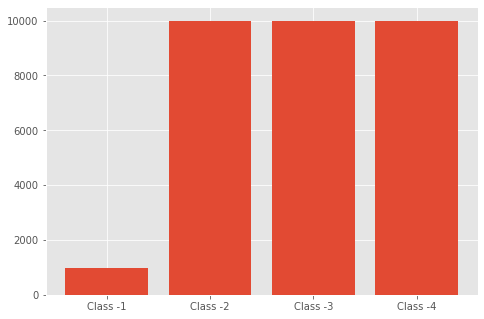

In [0]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Classes = ['Class -1', 'Class -2', 'Class -3', 'Class -4']
count = Counter(data["Severity"])
counts = [count[1], count[2], count[3], count[4]]
ax.bar(Classes,counts)
plt.show()

In [0]:
data.drop(["index"], axis= 1, inplace= True)

dummy_cate_col_index = []
cate_col = []
counter  = 0
for col in data.columns:
  if str(data[col].dtype) == "category":
    dummy_cate_col_index.append(counter)
    cate_col.append(col)
  counter += 1

cate_col_index = []

for index in dummy_cate_col_index:
  cate_col_index.append(index - 1)

cate_col_index

[3,
 4,
 5,
 6,
 7,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 29]

In [0]:
cate_col

['Side',
 'City',
 'County',
 'State',
 'Timezone',
 'Wind_Direction',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Weekday']

In [0]:
for col in data.columns:
  if str(data[col].dtype) == "category":
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(df_sel[col])
    data[col] = label_encoder.transform(data[col])
    with open(f"{col}_encoder.pkl", "wb") as f:
      pickle.dump(label_encoder, f)

In [0]:
target = data["Severity"]

data.drop(["Severity"], axis=1, inplace=True)

target_encoder = preprocessing.LabelEncoder()
target_encoder.fit(target)
target_ = target_encoder.transform(target)

In [0]:
# convert integers to dummy variables (i.e. one hot encoded)

# run this for deep learning

target_ = np_utils.to_categorical(target_)

In [0]:
Counter(target_)

Counter({0: 968, 1: 10000, 2: 10000, 3: 10000})

In [0]:
sm = SMOTENC(random_state=42, categorical_features= cate_col_index)
X_res, y_res = sm.fit_resample(data, target_)
print('Resampled dataset samples per class {}'.format(Counter(y_res)))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Resampled dataset samples per class Counter({0: 10000, 3: 10000, 1: 10000, 2: 10000})


In [0]:
X = X_res
y = y_res

# X = data
# y = target_

In [0]:
# For deep learning 
x_remain, x_valid, y_remain, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

x_train, x_test, y_train, y_test = train_test_split(x_remain, y_remain, test_size=0.2, random_state=42, stratify=y_remain)

In [0]:
# For Machine Learning learning 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [0]:
# Logistic regression
lr = LogisticRegression(multi_class='multinomial' ,random_state=42)
lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

print("[Logistic regression algorithm] accuracy_score: {:.3f}.".format(acc))
print(classification_report(y_pred, y_test))

[Logistic regression algorithm] accuracy_score: 0.592.
              precision    recall  f1-score   support

           0       0.55      0.61      0.58      1805
           1       0.70      0.52      0.60      2703
           2       0.46      0.56      0.50      1647
           3       0.66      0.71      0.68      1845

    accuracy                           0.59      8000
   macro avg       0.59      0.60      0.59      8000
weighted avg       0.61      0.59      0.59      8000



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
svm_clf = svm.LinearSVC()
svm_clf.fit(x_train, y_train)
y_pred = svm_clf.predict(x_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Model Accuracy, how often is the classifier correct?
print("[SVM algorithm] accuracy_score: {:.3f}.".format(acc))
print(classification_report(y_pred, y_test))

[SVM algorithm] accuracy_score: 0.379.
              precision    recall  f1-score   support

           0       0.98      0.29      0.45      6789
           1       0.03      0.63      0.06       101
           2       0.05      0.66      0.10       157
           3       0.45      0.95      0.61       953

    accuracy                           0.38      8000
   macro avg       0.38      0.63      0.30      8000
weighted avg       0.89      0.38      0.45      8000



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
NB_clf = GaussianNB()
NB_clf.fit(x_train, y_train)
y_pred=NB_clf.predict(np.array(x_test))

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Model Accuracy, how often is the classifier correct?
print("[Naive Bieas algorithm] accuracy_score: {:.3f}.".format(acc))
print(classification_report(y_pred, y_test))

[Naive Bieas algorithm] accuracy_score: 0.694.
              precision    recall  f1-score   support

           0       0.85      0.70      0.77      2420
           1       0.30      0.78      0.44       779
           2       0.92      0.56      0.69      3301
           3       0.70      0.94      0.80      1500

    accuracy                           0.69      8000
   macro avg       0.69      0.74      0.68      8000
weighted avg       0.80      0.69      0.71      8000



In [0]:
SGD_clf = SGDClassifier()
SGD_clf.fit(x_train, y_train)
y_pred= SGD_clf.predict(np.array(x_test))

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Model Accuracy, how often is the classifier correct?
print("[Shocatic Gradient Descent algorithm] accuracy_score: {:.3f}.".format(acc))
print(classification_report(y_pred, y_test))

[Shocatic Gradient Descent algorithm] accuracy_score: 0.517.
              precision    recall  f1-score   support

           0       0.61      0.61      0.61      1973
           1       0.94      0.38      0.54      4879
           2       0.06      0.71      0.12       181
           3       0.46      0.96      0.62       967

    accuracy                           0.52      8000
   macro avg       0.52      0.67      0.47      8000
weighted avg       0.78      0.52      0.56      8000



In [0]:
# Random Forest algorithm

RF_clf= RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
RF_clf.fit(np.array(x_train),np.array(y_train))

y_pred= RF_clf.predict(np.array(x_test))

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Model Accuracy, how often is the classifier correct?
print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(acc))
print(classification_report(y_pred, y_test))

[Randon forest algorithm] accuracy_score: 0.919.
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1982
           1       0.85      0.89      0.87      1913
           2       0.91      0.86      0.88      2134
           3       0.96      0.97      0.96      1971

    accuracy                           0.92      8000
   macro avg       0.92      0.92      0.92      8000
weighted avg       0.92      0.92      0.92      8000



In [0]:
with open("Random_Forest.pkl", "wb") as f:
  pickle.dump(RF_clf, f)

In [0]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)
y_pred = knn_clf.predict(x_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Model Accuracy, how often is the classifier correct?
print("[KNN algorithm] accuracy_score: {:.3f}.".format(acc))
print(classification_report(y_pred, y_test))

[KNN algorithm] accuracy_score: 0.835.
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      2153
           1       0.74      0.77      0.75      1915
           2       0.81      0.75      0.78      2141
           3       0.85      0.95      0.90      1791

    accuracy                           0.83      8000
   macro avg       0.83      0.84      0.83      8000
weighted avg       0.84      0.83      0.83      8000



In [0]:
xgb_clf = XGBClassifier(
  learning_rate =0.1,
  n_estimators=1000,
  max_depth=5,
  min_child_weight=1,
  gamma=0,
  subsample=0.8,
  colsample_bytree=0.8,
  objective= 'multi:softmax',
  num_class =4,
  nthread=4,
  scale_pos_weight=1,
  seed=27)

xgb_clf.fit(x_train, y_train)
y_pred = xgb_clf.predict(x_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Model Accuracy, how often is the classifier correct?
print("[XGBoost algorithm] accuracy_score: {:.3f}.".format(acc))
print(classification_report(y_pred, y_test))

[XGBoost algorithm] accuracy_score: 0.934.
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1971
           1       0.87      0.91      0.89      1914
           2       0.93      0.87      0.90      2124
           3       0.97      0.98      0.97      1991

    accuracy                           0.93      8000
   macro avg       0.93      0.94      0.93      8000
weighted avg       0.93      0.93      0.93      8000



In [0]:
params = {
    'objective' :'multiclass',
    'num_class': 4,
    'num_iterations': 1000,
    'learning_rate' : 0.09,
    'num_leaves': 90,
    'num_threads': 8,
    'max_depth': 20,
    'bagging_freq': 1,
    'seed': 42,
    'boosting_type' : 'gbdt',
    'metric': 'multi_logloss'
}

# making lgbm datasets for train and valid
d_train = lgbm.Dataset(x_train, y_train)
d_valid = lgbm.Dataset(x_valid, y_valid)

NameError: ignored

In [0]:
# training with early stop
lgbm_clf = lgbm.train(params, d_train, 5000, valid_sets=[d_valid], verbose_eval=50, early_stopping_rounds=50)

NameError: ignored

In [0]:
y_pred = lgbm_clf.predict(x_test)

y_pred_class = []

for pred_ in y_pred:
  y_pred_class.append(np.argmax(pred_))

# Get the accuracy score
acc=accuracy_score(y_test, y_pred_class)

# Model Accuracy, how often is the classifier correct?
print("[Light GBM algorithm] accuracy_score: {:.3f}.".format(acc))
print(classification_report(y_pred_class, y_test))

In [0]:
clf1 = XGBClassifier(
  learning_rate =0.1,
  n_estimators=1000,
  max_depth=5,
  min_child_weight=1,
  gamma=0,
  subsample=0.8,
  colsample_bytree=0.8,
  objective= 'multi:softmax',
  num_class =4,
  nthread=4,
  scale_pos_weight=1,
  seed=27)

clf2 = RandomForestClassifier(n_estimators=200)

V_clf = VotingClassifier(estimators=[('xgb', clf1), ('RF', clf2)], voting='soft')
V_clf = V_clf.fit(x_train, y_train)
y_pred = V_clf.predict(x_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Model Accuracy, how often is the classifier correct?
print("[Voting Classifier Algorithm] accuracy_score: {:.3f}.".format(acc))
print(classification_report(y_pred, y_test))

[Voting Classifier Algorithm] accuracy_score: 0.932.
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1978
           1       0.86      0.92      0.89      1888
           2       0.93      0.87      0.90      2152
           3       0.97      0.98      0.97      1982

    accuracy                           0.93      8000
   macro avg       0.93      0.93      0.93      8000
weighted avg       0.93      0.93      0.93      8000



In [0]:
filepath="/content/gdrive/My Drive/Major/Base Model/epochs:{epoch:03d}-val_acc:{val_accuracy:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint]

In [0]:
x_train = np.array(x_train).reshape(x_train.shape[0], x_train.shape[1], 1)
x_valid = np.array(x_valid).reshape(x_valid.shape[0], x_valid.shape[1], 1)
x_test = np.array(x_test).reshape(x_test.shape[0], x_test.shape[1], 1)

In [0]:
#create model
model = Sequential()

#add model layers
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1],1)))
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model = Sequential()
model.add(Dense(5000, input_dim=13615, activation='relu'))
model.add(Dense(2500, activation='relu'))
model.add(Dense(1500, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(4, activation='softmax'))

# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [0]:
# Train the model
model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epochs,
                    # initial_epoch = #,
                    verbose=1,
                    # callbacks=callbacks_list,
                    validation_data=(x_valid, y_valid))

Train on 19819 samples, validate on 6194 samples
Epoch 1/10
 1204/19819 [>.............................] - ETA: 4:23 - loss: nan - accuracy: 0.0590

KeyboardInterrupt: ignored

In [0]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=28, verbose=1)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, target_, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))